In [1]:
import pandas as pd

In [90]:
data=pd.read_csv('/Users/amorav/Library/Mobile Documents/com~apple~CloudDocs/DS_projects/car_value_estimator/data/ads_all.csv')

In [149]:
data.head()

,price,brand,model,title,year,km,steering_side,region_specs,location,tags,car_age,warranty
0,159000.0,Ford,F-Series Pickup,svt raptor 2018 f150 under service contract fe...,2018.0,107000.0,Left Hand,GCC Specs,"Sheikh Zayed Road, Dubai",NaN,6.0,False
1,276000.0,Ford,Mustang,"ford mustang shelby, original, american import...",2021.0,2000.0,Left Hand,American Specs,Saif Zone (Sharjah International Airport Free ...,NaN,3.0,True
2,62500.0,Ford,Edge,"black package â€¢ 1,295x48pm â€¢ 2016 ford edg...",2016.0,79000.0,Left Hand,GCC Specs,"Al Quoz, Dubai",NaN,8.0,False
3,169000.0,Ford,Mustang,"ford warranty â€¢ 2,660x60pm â€¢ 2020 ford mus...",2020.0,55000.0,Left Hand,GCC Specs,"Al Quoz, Dubai",NaN,4.0,True
4,209000.0,Ford,Mustang,"ford warranty â€¢ 3,290x60pm â€¢ 2023 ford mus...",2023.0,29000.0,Left Hand,GCC Specs,"Al Quoz, Dubai",NaN,1.0,True


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21122 entries, 0 to 21121
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21122 non-null  int64  
 1   ad_id          21122 non-null  object 
 2   link           21122 non-null  object 
 3   num_of_pic     20872 non-null  float64
 4   price          20876 non-null  object 
 5   brand          20876 non-null  object 
 6   model          20876 non-null  object 
 7   title          20871 non-null  object 
 8   year           20872 non-null  float64
 9   km             20872 non-null  object 
 10  steering_side  20872 non-null  object 
 11  region_specs   20872 non-null  object 
 12  location       20872 non-null  object 
 13  tags           4522 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.3+ MB


In [93]:
#remove unneccessary columns and NaN
data.drop(columns=['id', 'ad_id', 'link', 'num_of_pic'], inplace=True)
data.dropna(how='all', inplace=True)

In [ ]:
# Prepare features of dataset for analysis
# transform price to numeric
data['price']=data['price'].apply(lambda x: float(str(x).replace(',', '')))

# Remove 'km' string and convert to numeric
data['km'] = data['km'].str.replace(' km', '').str.replace(',', '').astype(float)

# Feature Engineering
# Extract car age
current_year = 2024
data['car_age'] = current_year - data['year']

In [118]:
print('Examine ad description to understand if we can get addidtional features')
data.title[:20].values

Examine ad description to understand if we can get addidtional features


array(['SVT Raptor 2018 F150 under service contract Feb 2026',
       'Ford Mustang Shelby, original, American import, only 2000 km, 2 year warranty',
       'Black Package â€¢ 1,295x48PM â€¢ 2016 Ford Edge EcoBoost SE 2.0 250bhp â€¢ Full Service History Ford',
       'FORD WARRANTY â€¢ 2,660x60PM â€¢ 2020 Ford Mustang GT V8 450 BHP â€¢ Ford Service History â€¢ GCC',
       'Ford Warranty â€¢ 3,290x60PM â€¢ 2023 Ford Mustang GT V8 450 BHP â€¢ Ford Service Contract â€¢ GCC',
       'GCC / 2018 / HATCHBACK + BLUETOOTH SYSTEM + POWER LOCKS + / UNLIMITED MILEAGE WARRANTY',
       'GCC / 2017 / SEDAN + NAVIGATION + CAMERA + BLUETOOTH SYSTEM + POWER LOCKS / UNLIMITED KMS WARRANTY',
       'RECOVERY + FULL DOWN PLATFORM FROM P.M / 2018 / GCC / F550 / AUTOMATIC GEAR-BOX + DIESEL + 3 SEATERS',
       'DIGITAL CLUSTER/RECARO SEATS/ACTIVE EXHAUST/FULL OPTION',
       'AED3221/month | 2021 Ford F 150 3.5L | Warranty | Service | GCC Specifications | Ref#137079',
       'AED 1,651 PM â€¢ TERRITORY â

One feature that can be extracted is 'Warranty', let's get it

In [123]:

data['title']=data['title'].str.lower()
data['warranty']=data['title'].apply(lambda x: 'warranty' in str(x))

Now let's analyse the target feature of this dataset and find outliers

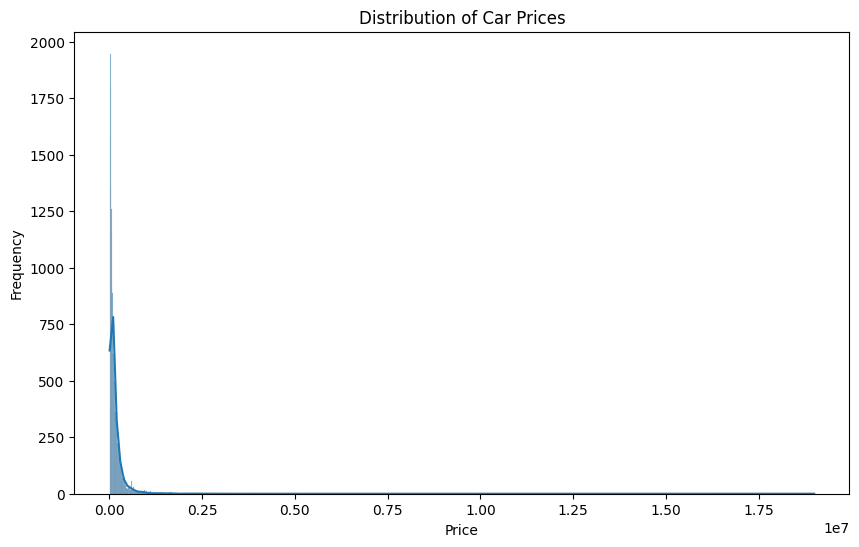

In [142]:
#Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

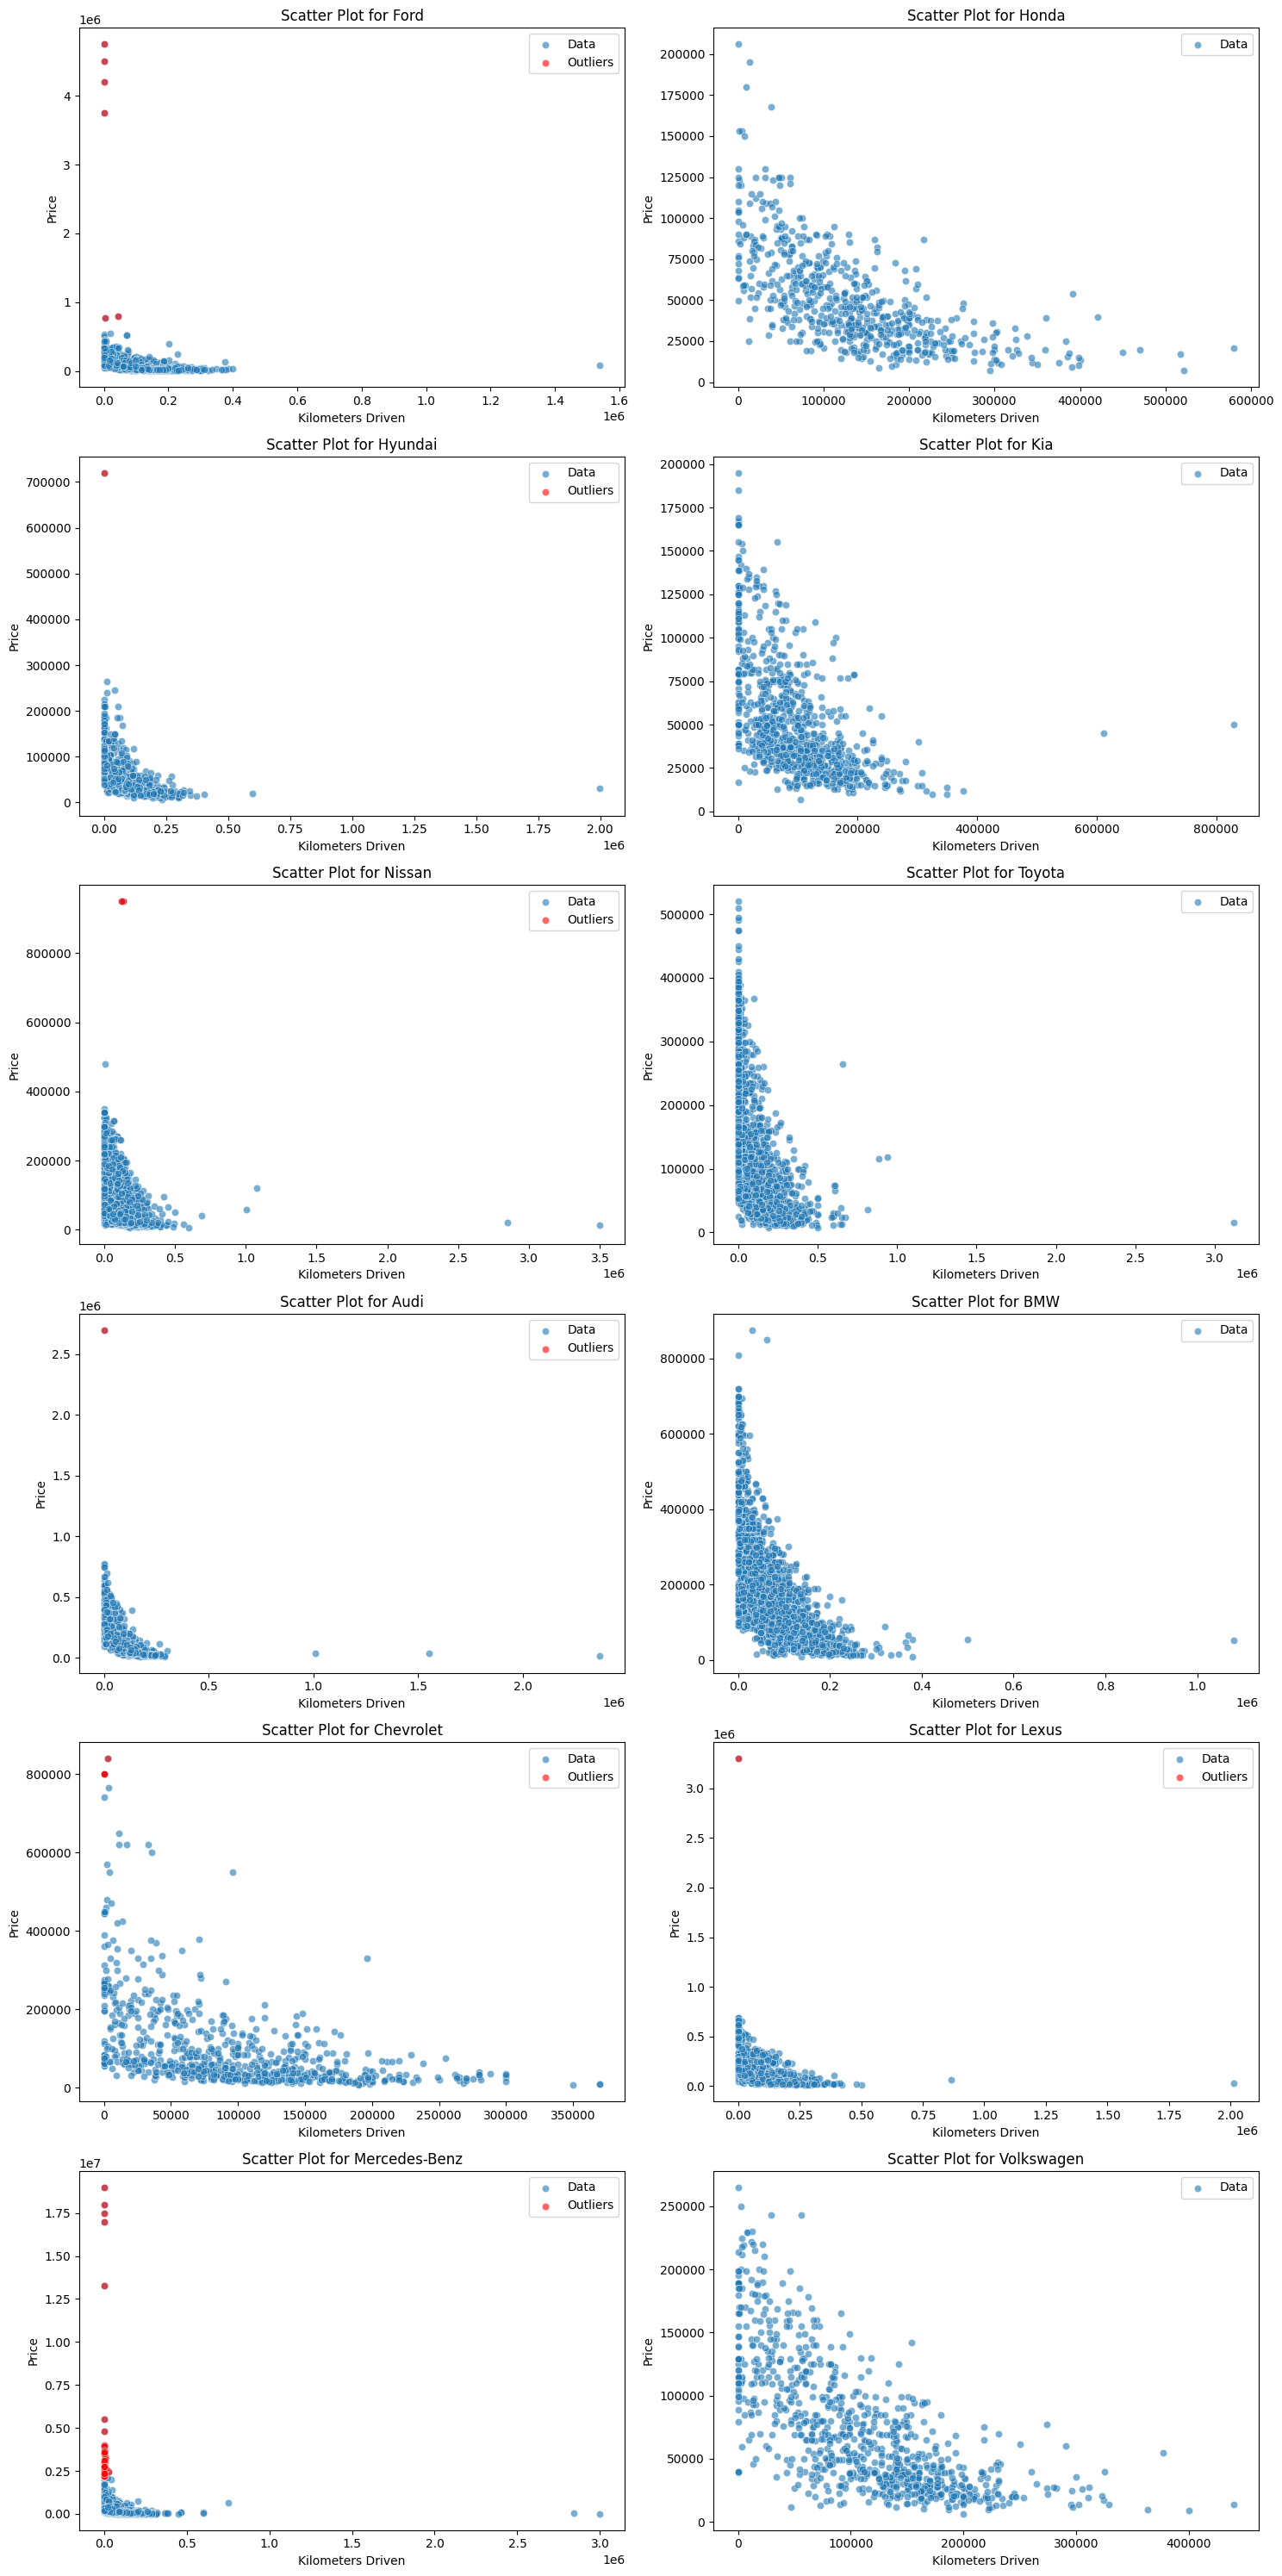

Detected 49 number of outliers


,price,brand,model,title,year,km,steering_side,region_specs,location,tags,car_age,warranty
36,4499999.0,Ford,GT,2022 ford gt studio collection | 1 of 20 | fm-...,2022.0,0.0,Left Hand,European Specs,"Al Quoz, Dubai",NaN,2.0,False
202,799999.0,Ford,Mustang,1968 ford muêœ±tang êœ±helby | gt350 faêœ±tbac...,1968.0,43209.0,Left Hand,American Specs,"Al Quoz, Dubai",FEATURED,56.0,False
227,4750000.0,Ford,GT,gcc i ford gt i heritage edition i brand new,2019.0,60.0,Left Hand,GCC Specs,"Al Quoz, Dubai",FEATURED,5.0,False
249,4200000.0,Ford,GT,ford gt liquid carbon 1 of 25 + full carbon bo...,2022.0,30.0,Left Hand,European Specs,"Deira, Dubai",FEATURED,2.0,False
460,3750000.0,Ford,GT,ford gt heritage edition limited,2022.0,30.0,Left Hand,European Specs,"Deira, Dubai",NaN,2.0,False
1239,769000.0,Ford,Mustang,1968 ford mustang eleanor gt500 tribute editio...,1968.0,3000.0,Left Hand,American Specs,"Al Quoz, Dubai",NaN,56.0,False
1999,720000.0,Hyundai,Genesis,2024 hyundai genesis gv80 twilight edition ( 1...,2024.0,50.0,Left Hand,GCC Specs,"Sheikh Zayed Road, Dubai",FEATURED,0.0,True
4268,949999.0,Nissan,GT-R,1999 nissan gt-r r 34 series 1 | fm-inv.fc -1031,1999.0,137492.0,Left Hand,Japanese Specs,"Al Quoz, Dubai",FEATURED,25.0,False
4269,949999.0,Nissan,GT-R,1999 nissan skyline gt-r 34 series 1 | fm-inv....,1999.0,121460.0,Left Hand,Japanese Specs,"Dubai Marina, Dubai",FEATURED,25.0,False
10552,2700000.0,Audi,S8,audi a8 long security vr9 werkspanzer/guard ne...,2024.0,50.0,Left Hand,European Specs,"Deira, Dubai",NaN,0.0,False


In [141]:
import numpy as np

# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Get unique brands
brands = data['brand'].unique()

# Create scatter plots with outliers highlighted for each brand
n_rows = (len(brands) + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))

outliers_df=[]
for i, brand in enumerate(brands):
    ax = axes[i // 2, i % 2]
    brand_data = data[data['brand'] == brand]
    outliers = detect_outliers(brand_data, 'price')
    outliers_df.append(outliers)
    sns.scatterplot(x='km', y='price', data=brand_data, ax=ax, label='Data', alpha=0.6)
    sns.scatterplot(x='km', y='price', data=outliers, ax=ax, label='Outliers', color='red', alpha=0.6)
    
    ax.set_title(f'Scatter Plot for {brand}')
    ax.set_xlabel('Kilometers Driven')
    ax.set_ylabel('Price')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

outliers_df=pd.concat(outliers_df)
print(f'Detected {len(outliers_df)} ads that are outliers')
outliers_df

In [144]:
#Remove outliers and review the Prices per brand again
data_cleaned=data.drop(index=outliers_df.index)

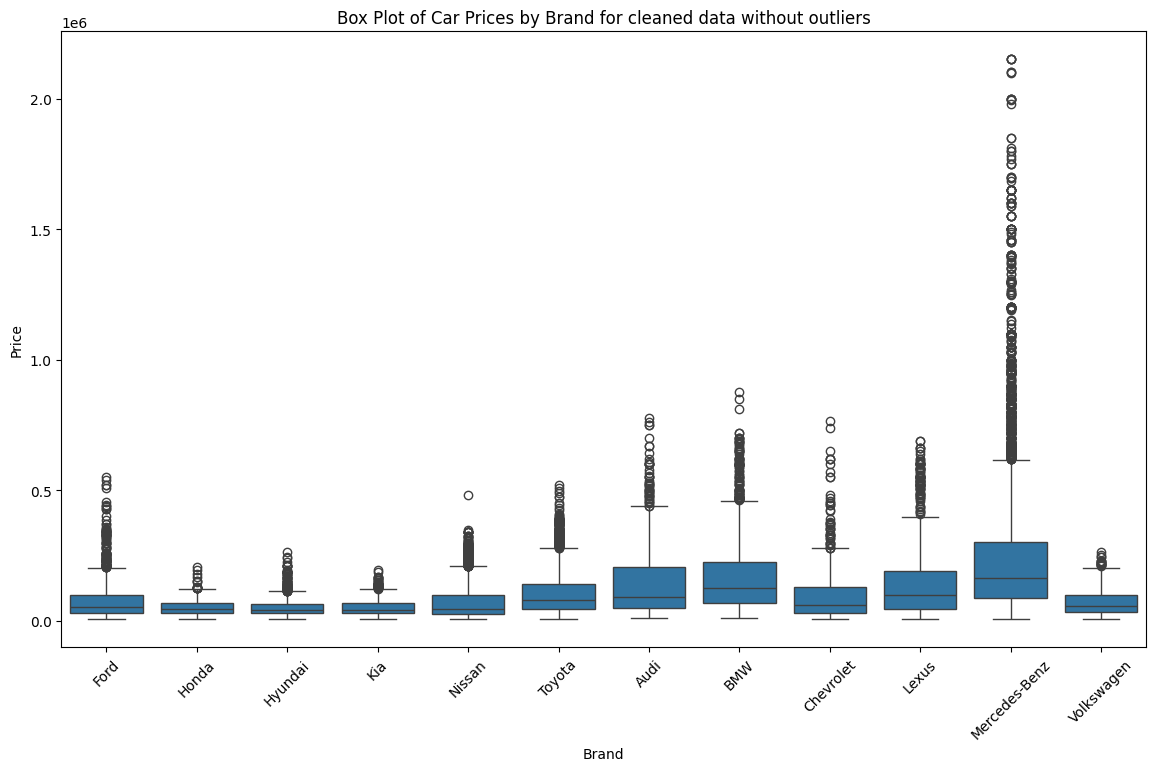

In [146]:
# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='brand', y='price', data=data_cleaned)
plt.title('Box Plot of Car Prices by Brand for cleaned data without outliers')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Prepare features and build the model


In [198]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
unique_counts = data_cleaned[categorical_columns].nunique()
unique_counts

brand               12
model              361
title            18732
steering_side        2
region_specs         8
location           356
tags                 1
dtype: int64

In [199]:
#Prepare data
data_cleaned_ = data_cleaned.drop(columns=['year', 'title', 'location', 'tags'])  # Dropping columns not needed for the model

# Check for NaN values in data again
nan_columns = data_cleaned_.columns[data_cleaned_.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['km', 'steering_side', 'region_specs', 'car_age']


In [200]:
#Review and delete nan
print('Nan in km column')
print(data_cleaned_[data_cleaned_.km.isna()])


Nan in km column
         price    brand     model  km steering_side region_specs  car_age  \
1331   67900.0    Honda      City NaN           NaN          NaN      NaN   
1972   60000.0  Hyundai   Elantra NaN           NaN          NaN      NaN   
3180   41900.0      Kia    Cerato NaN           NaN          NaN      NaN   
6760  129000.0   Toyota  Fortuner NaN           NaN          NaN      NaN   

      warranty  
1331     False  
1972     False  
3180     False  
6760     False  


In [201]:
#Remove nan
data_cleaned_=data_cleaned_[~data_cleaned_.km.isna()]

In [202]:
# Check for NaN values in data again
nan_columns = data_cleaned_.columns[data_cleaned_.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [203]:
#data_final

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
# Normalize numerical columns
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
data_final = pd.get_dummies(data_cleaned_, columns=['brand', 'model', 'steering_side', 'region_specs'])

numerical_cols = [ 'km', 'car_age']
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

# Define features and target
X = data_final.drop('price', axis=1)
y = data_final['price']

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['uint8', 'bool']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in X_train
nan_columns = X_train.columns[X_train.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

# If NaN values are found, fill them
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())
X_test[numerical_columns] = X_test[numerical_columns].fillna(X_test[numerical_columns].median())

# Apply Standard Scaling to numerical columns only
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


# Building an ensemble of models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

# Choose the best model based on MAE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Print the results
print("Results of mean_absolute_error for each model:", results)
print("Best model:", best_model_name)

Columns with NaN values: []
Results of each model: {'RandomForest': 22907.525747290118, 'GradientBoosting': 45120.128523030085, 'AdaBoost': 81110.96050476933}
Best model: RandomForest


### Add hyperparameter tunning to the best model defined

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mean Absolute Error of the best model: 22832.81937624285
                 Feature  Importance
0                     km    0.322669
137        model_G-Class    0.283965
1                car_age    0.076201
11   brand_Mercedes-Benz    0.058059
42             model_AMG    0.022997
..                   ...         ...
249             model_Q2    0.000000
256         model_Quoris    0.000000
202             model_M1    0.000000
18     model_240/260/280    0.000000
291          model_Scion    0.000000

[386 rows x 2 columns]


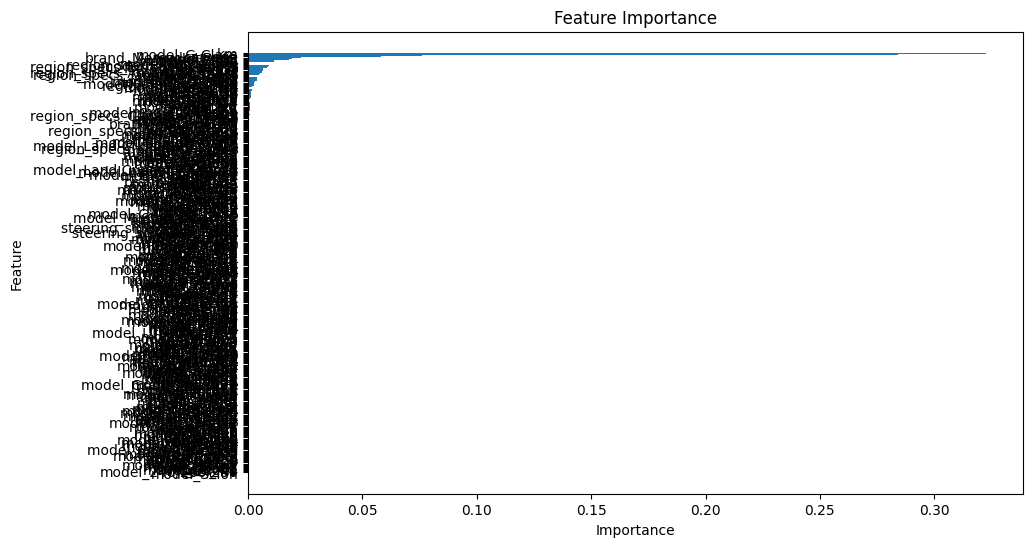

In [205]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error of the best model: {mae}')

# Identify the most important features
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)


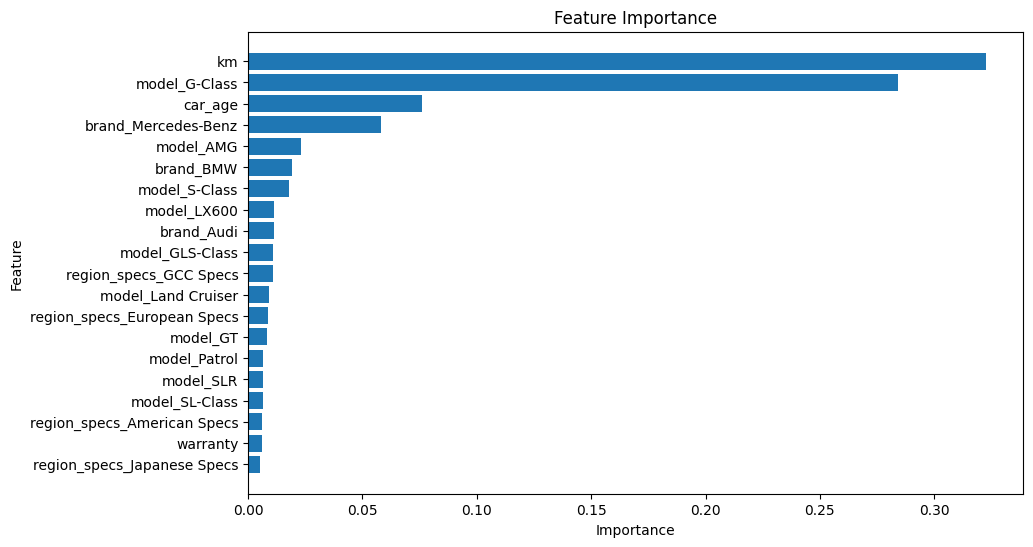

In [208]:
# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.title('Top 20 Features Importance ')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [213]:
print('Best model is RandomForestRegressor with params ')
grid_search.best_estimator_.get_params()

Best model is RandomForestRegressor with params 


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=   4.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.6; total time=   2.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimator

### Try Xgbooost

In [209]:
#Test xgboost model from native library
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Best parameters and model
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'Best parameters for XGBoost: {random_search_xgb.best_params_}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
XGBoost Mean Absolute Error: 25091.213997288367
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
